# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


use 500 random data to do the Machine Learning

In [4]:
df_test=df.sample(500)
df_test

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
968,8.563556,4.166039,4.397517,0.031714,0.034325,0.036839,0.039379,0.042068,0.045029,0.048385,...,1.003490,1.004920,1.006440,1.008025,1.009653,1.011297,1.012936,1.014545,1.016100,1.017577
1798,9.400781,4.846958,4.553823,0.030497,0.032949,0.035308,0.037686,0.040191,0.042935,0.046028,...,1.005187,1.004955,1.004831,1.004854,1.005060,1.005490,1.006180,1.007169,1.008495,1.010197
2099,9.569175,5.165750,4.403426,0.030751,0.033285,0.035713,0.038150,0.040712,0.043514,0.046672,...,1.003633,1.004662,1.005837,1.007174,1.008685,1.010386,1.012291,1.014413,1.016767,1.019368
5327,10.047314,5.744295,4.303019,0.030518,0.033033,0.035439,0.037850,0.040380,0.043143,0.046252,...,0.995828,0.997510,0.999447,1.001645,1.004112,1.006854,1.009877,1.013189,1.016795,1.020702
1377,9.956176,5.956176,4.000000,0.030005,0.032357,0.034626,0.036916,0.039326,0.041960,0.044919,...,0.982956,0.986757,0.990989,0.995680,1.000862,1.006563,1.012815,1.019647,1.027089,1.035172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,9.168122,5.030930,4.137193,0.030952,0.033497,0.035939,0.038395,0.040981,0.043813,0.047008,...,0.998185,1.001060,1.004178,1.007541,1.011150,1.015007,1.019114,1.023473,1.028086,1.032955
7465,9.536303,5.126429,4.409874,0.030622,0.033136,0.035545,0.037962,0.040503,0.043281,0.046410,...,1.003548,1.004207,1.004988,1.005933,1.007082,1.008477,1.010160,1.012172,1.014553,1.017346
2469,10.802399,6.758272,4.044127,0.030127,0.032592,0.034952,0.037314,0.039789,0.042486,0.045516,...,0.986038,0.988821,0.991989,0.995571,0.999599,1.004103,1.009115,1.014665,1.020783,1.027501
6749,10.378892,6.068338,4.310554,0.030061,0.032458,0.034763,0.037083,0.039521,0.042182,0.045171,...,0.992112,0.993611,0.995445,0.997654,1.000277,1.003353,1.006920,1.011017,1.015683,1.020957


single output*(predict Num Cu)

In [5]:
from sklearn.model_selection import train_test_split
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [8]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.metrics import r2_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [20]:
def DecisionTreeRegression(max_depth, X_train, X_test, y_train, y_test, plot_min, plot_max):
    clf = tree.DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = 5)
    clf = clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    MSE = ((y_pred-y_test)**2).mean()
    print("MSE = " , MSE)
    print('R-squared of training data is', clf.score(X_train, y_train))
    print('R-squared of testing data is' , clf.score(X_test, y_test))

    
    fig, axs = plt.subplots(1,1,figsize=(12,12))
    axs.scatter(y_test, clf.predict(X_test))
    plt.rcParams.update({'font.size': 14})
    axs.plot(np.linspace( plot_min, plot_max), np.linspace( plot_min, plot_max), color='red')
    axs.set_ylabel('Predicted')
    axs.set_xlabel('True')
    

    

MSE =  0.05340885654839347
R-squared of training data is 0.9666649457589553
R-squared of testing data is 0.8341924064314055


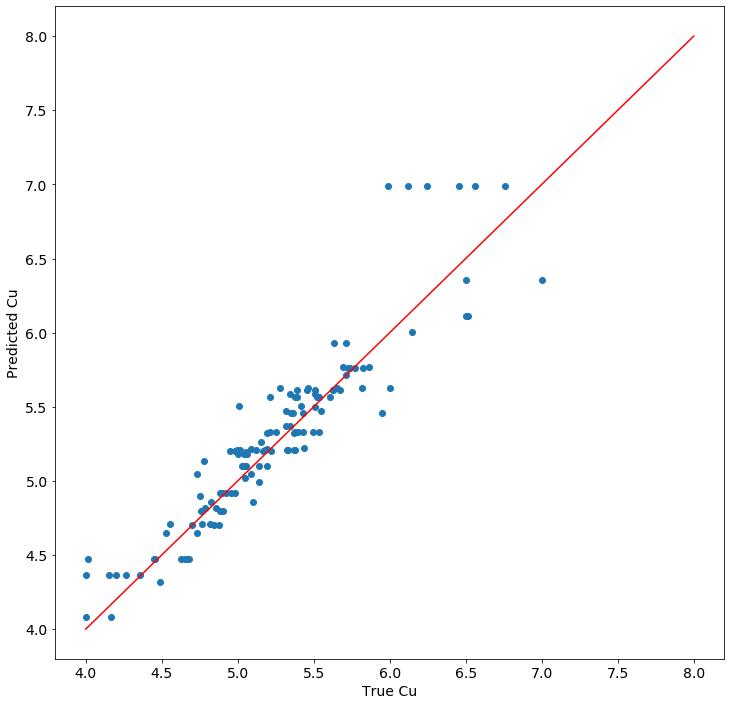

In [18]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# predict only Num of Te

In [51]:
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


In [52]:
min(df_test['Num Te'])

4.0

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


MSE =  0.0013855048634325662
R-squared of training data is 0.9930195406268857
R-squared of testing data is 0.9726884696068767


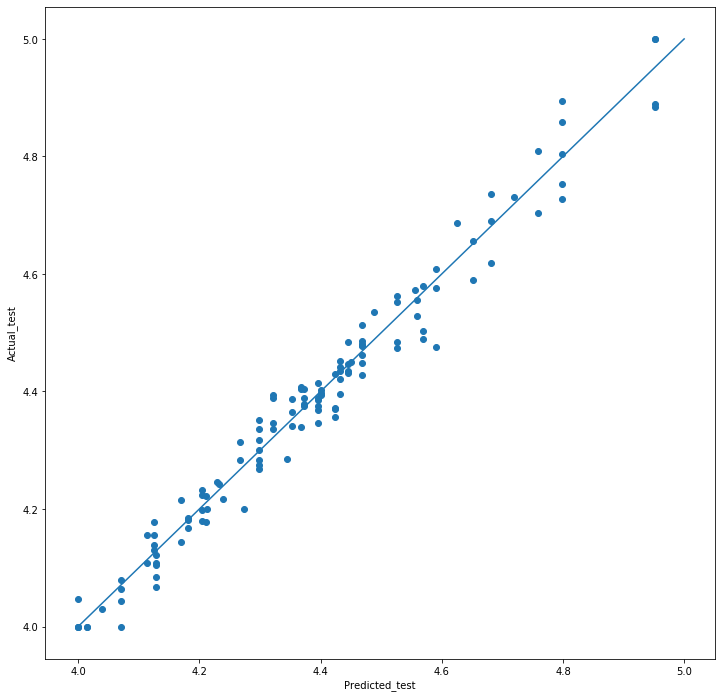

In [54]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

# use spectra predict Num of Cu, Te as multi target regression

In [22]:
# Multi target regression
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 100)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125, 2)


In [23]:
gpr = model.fit(train_features, train_labels)

NameError: name 'model' is not defined

MSE =  0.04044450344808485
R-squared of training data is 0.9541853880160646
R-squared of testing data is 0.7810895640552146


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


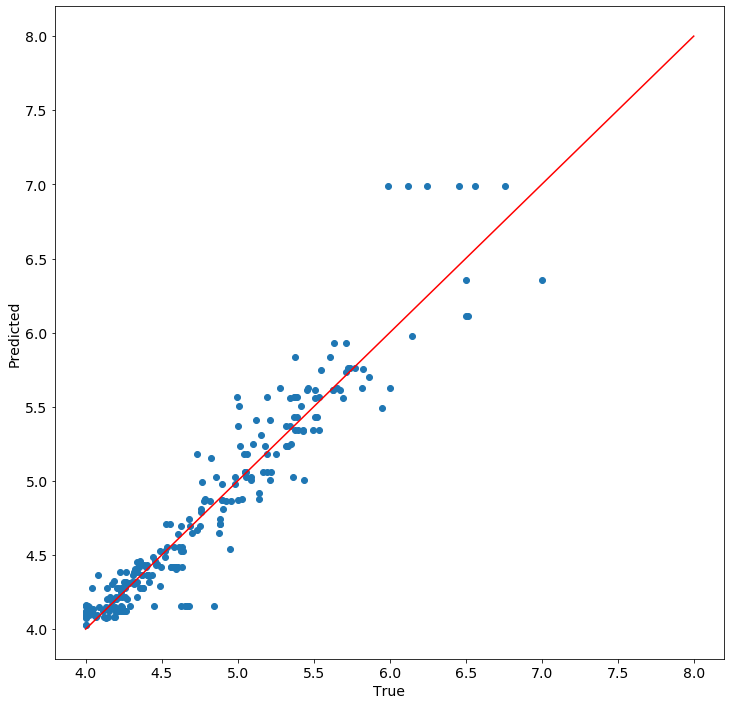

In [24]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

from the above, we can see that if we use multi target regression, the predicted values are still reasonable.
In the following, I am trying to use 1st and/or 2nd derivate to predict the number of atoms by multi target regression.

generate a derivate dataframe from the test dataframe.

In [25]:
import sys
sys.path.append('../PredictXANES')
import xanes_derivatives

In [26]:
dmu1, dmu2 = xanes_derivatives.xanes_derivatives(df_test)

In [27]:
# use first derivate only 
features=dmu1
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 99)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125, 2)


MSE =  0.03740576408370015
R-squared of training data is 0.9421055616164807
R-squared of testing data is 0.7975370835515019


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


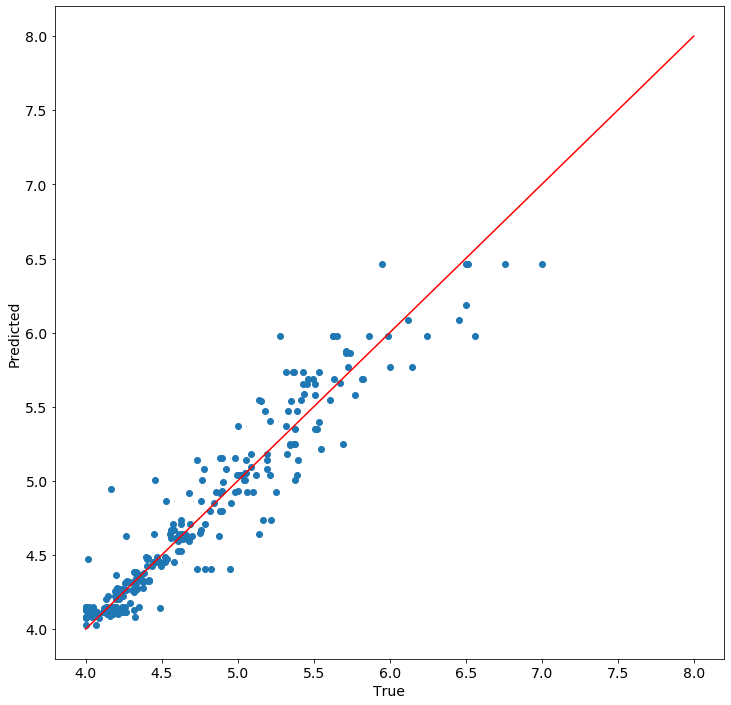

In [29]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [31]:
# use second derivate only 
features=dmu2
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 98)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125, 2)


MSE =  0.02295629671214253
R-squared of training data is 0.9601587322056464
R-squared of testing data is 0.8757464552041389


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


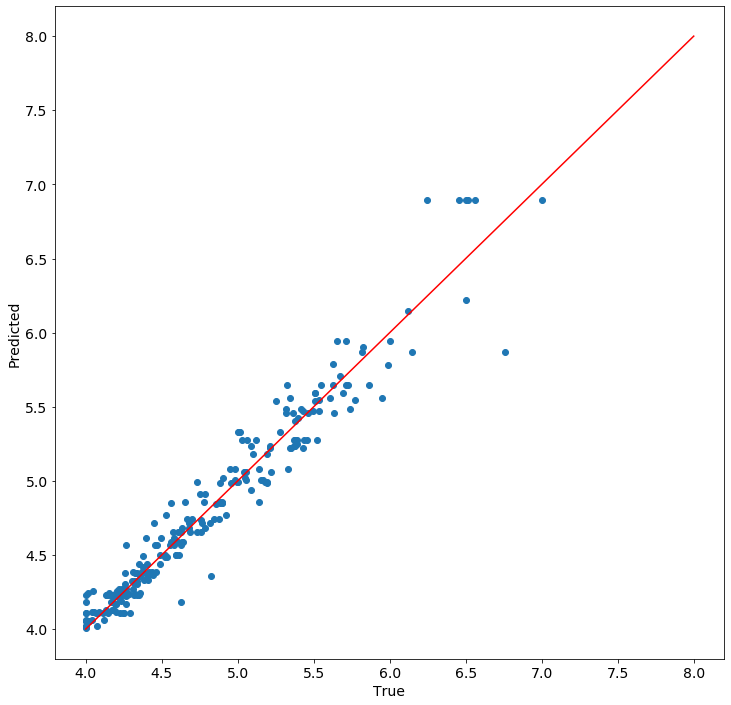

In [32]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and second derivate together, multi target regressor implementing 

In [33]:
dmu_both = np.concatenate((dmu1,dmu2),axis=1)
print('The shape of first derivate is:', dmu1.shape)
print('The shape of second derivate is:', dmu2.shape)
print('The shape of the concatenate derivate is:', dmu_both.shape)

The shape of first derivate is: (500, 99)
The shape of second derivate is: (500, 98)
The shape of the concatenate derivate is: (500, 197)


In [34]:
# use first and second derivate together
features=dmu_both
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 197)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 197)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 197)
Testing Labels Shape: (125, 2)


MSE =  0.025582052739966252
R-squared of training data is 0.9632409430495046
R-squared of testing data is 0.8615342545901948


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


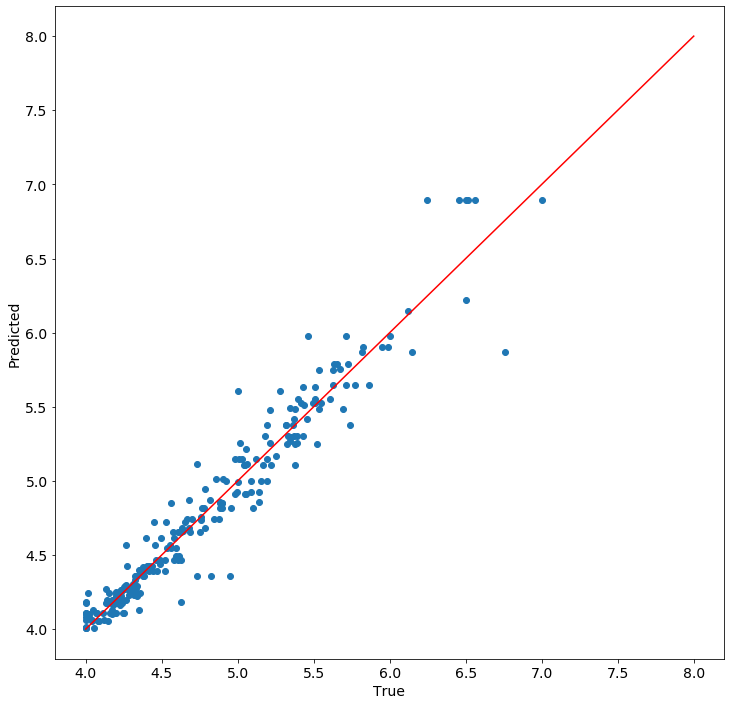

In [35]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

# use first and/or derivative to predict num of Cu, Te seperatly 

In [36]:
# use first derivate to predict Cu 
features=dmu1
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.059453073731781034
R-squared of training data is 0.9529905863903708
R-squared of testing data is 0.815428156998816


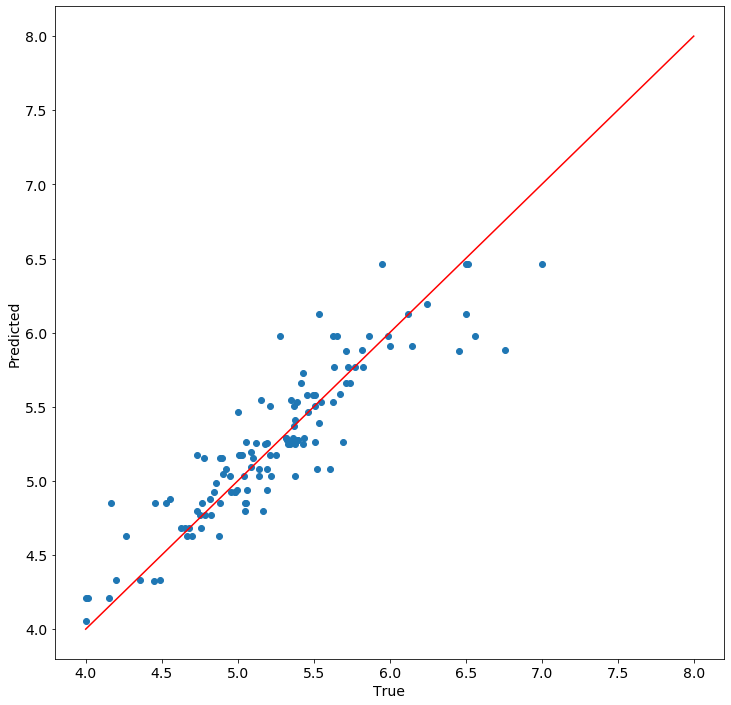

In [37]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [38]:
# use first derivate to predict Te
features=dmu1
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)


MSE =  0.0004042444039667752
R-squared of training data is 0.9978213151517454
R-squared of testing data is 0.9914705320567545


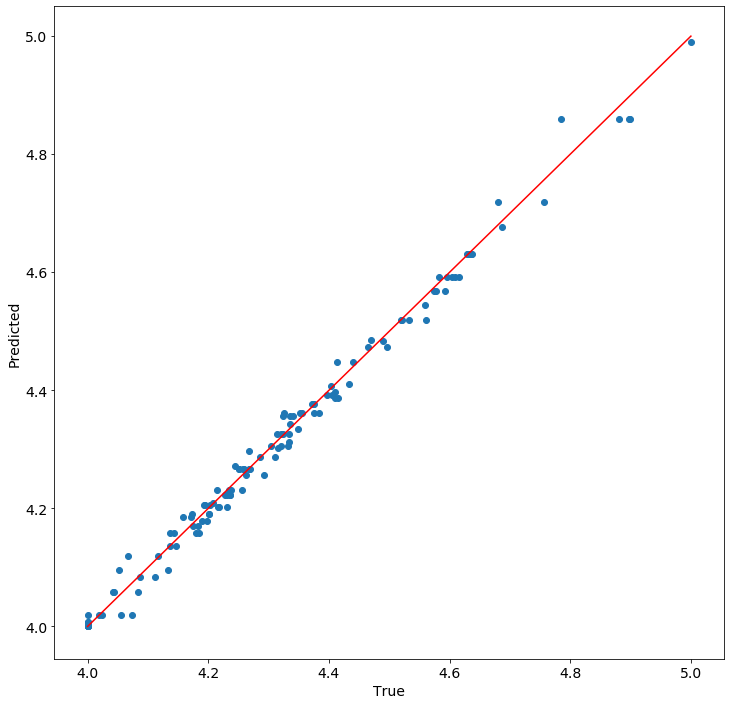

In [39]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

# This result is pretty good!

# The follwing is using second derivate to predict Cu,Te seperately

In [40]:
# use second derivate to predict Cu
features=dmu2
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', trin_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500,)


NameError: name 'trin_features' is not defined

MSE =  0.03722814916339678
R-squared of training data is 0.9671453872356515
R-squared of testing data is 0.8844253514358158


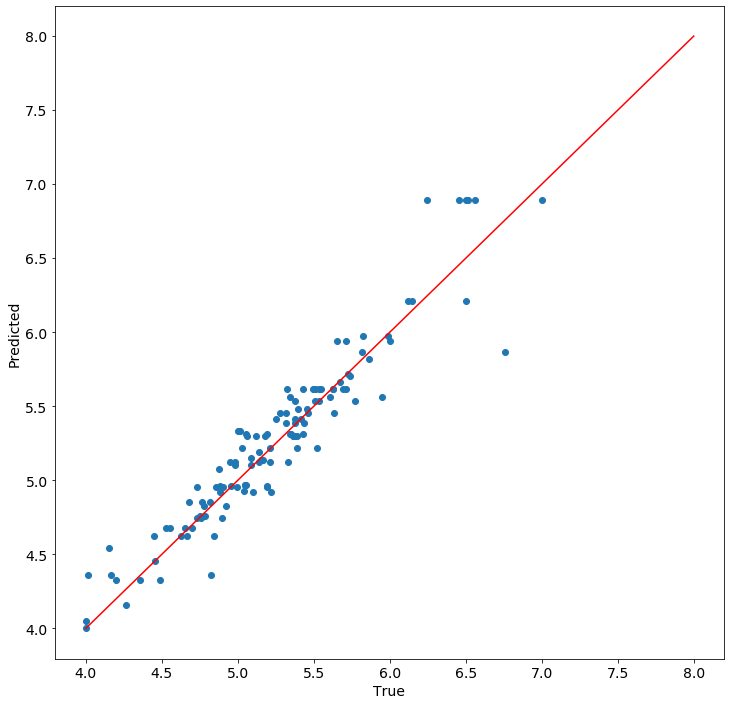

In [41]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 8)

In [75]:
# use second derivate to predict Te
features=dmu2
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)


MSE =  0.0019060731447893646
R-squared of training data is 0.9939139244913365
R-squared of testing data is 0.9624268553655897


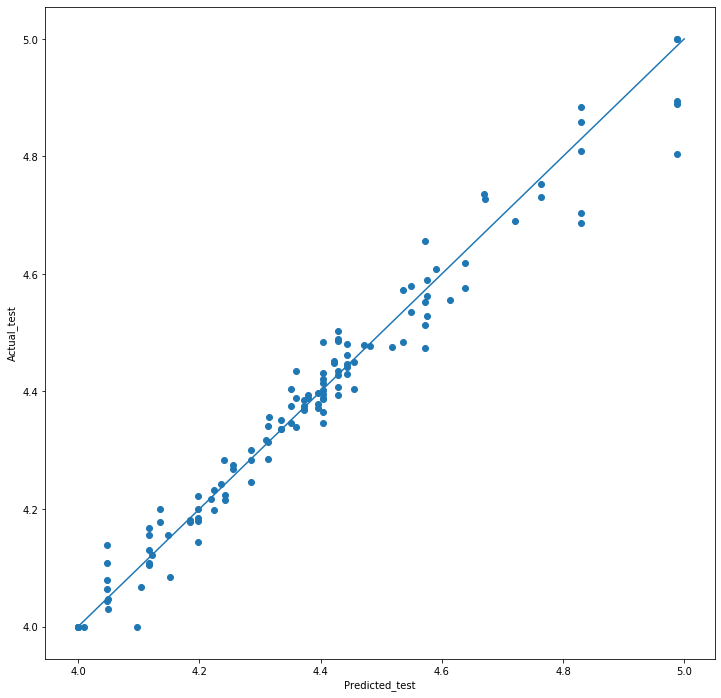

In [76]:
DecisionTreeRegression(10, train_features, test_features, train_labels,test_labels, 4, 5)

## Compared with spectra and first derivate, using second derivative data, both R2 for  Cu, Te are lower. Still the Cu has higher R2 compared with Te